# Cats vs Dogs Classifier
In this notebook I will construct a Deep Convolutional Netwoork to classify dogs and cats images.
First of all I will download the dataset from www.kaggle.com/c/dogs-vs-cats/data. I will use only a 10% of available data with:
- Training set with 2000 samples (1000 of each class).
- Validation set with 1000 samples (500 of each class).
- Validation set with 1000 samples (500 of each class).

In [1]:
import os, shutil


# Path to the uncompressed dataset
original_dir = './dataset1/train'
# Path to save smaller dataset
base_dir = './cats_vs_dogs_small'
os.mkdir(base_dir)

# Directories for training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory for training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory for training dogs pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory for validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory for validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory for validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory for validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train cats_dir
fnames =[f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to validation_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print(f'Total training cat images: ', len(os.listdir(train_cats_dir)))

Total training cat images:  1000


In [3]:
print('Total training dog images:', len(os.listdir(train_dogs_dir)))

Total training dog images: 1000


In [4]:
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))

Total validation cat images: 500


In [5]:
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total validation dog images: 500


In [6]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [7]:
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total test dog images: 500


## Building the network


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

We can check the dimension of the features maps change with every successive layer:

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

We can also visualize the model with a plot thar Keras offers

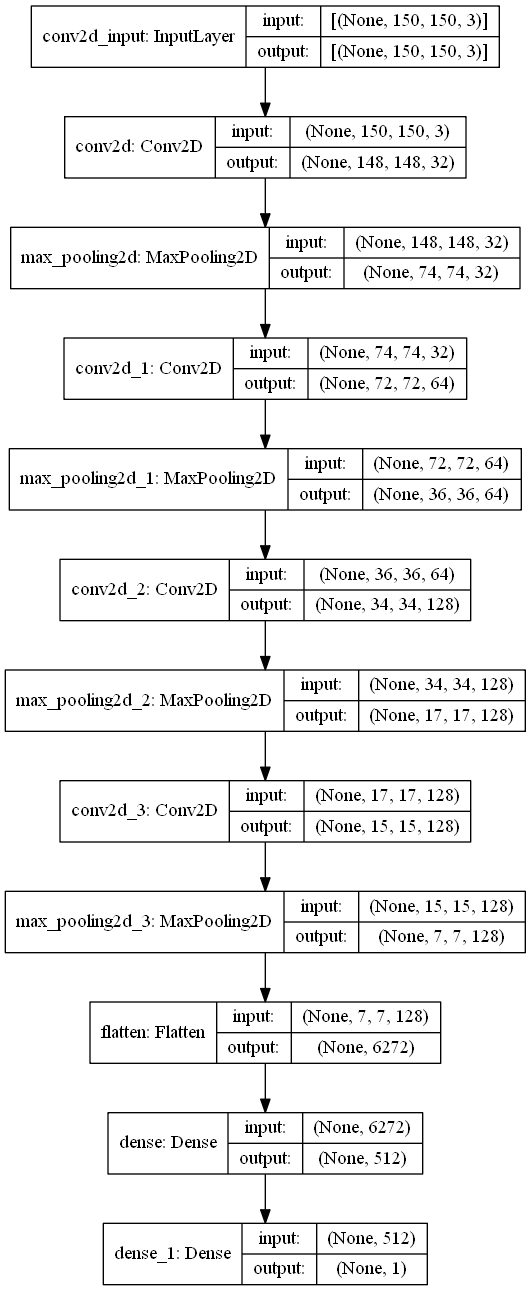

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

The selected optimizer of the convnet is RMSprop, with a learning rate of 0.0001. Because the convnet end with a single sigmoid unit binary crossentropy is use as the loss function

In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-04), metrics=['acc'])

## Data preprocessing
Input images must be preprocessed to transform it to floating-points tensors before beeing fed into the convnet. The preprocess proccess will be made by following:
1. Read the picture file.
2. Decode de JPEG file content to RGB grids of pixels.
3. Concert these into floating-point tensor.
4. Rescale the pixel values from [0,255] to [0,1] values.

Keras include contains _ImageDataGenerator_ class that can quickly set up Python generators that can automatically turn image files into bathces of tensors.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Images pixels values need to be rescaled by 1/255
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
                        # This is the target directory
                        train_dir,
                        # All image will be resized to 150x150
                        target_size=(150,150),
                        batch_size=20,
                        # We need binary labels
                        class_mode='binary'
                  )
validation_generator = test_data_generator.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


To fit the model with these generator we need to use _fit_ function, passing generator as training data. These function params needs to be setted properly:
 - **steps\_per\_epochs**: The declared generator use batches of 20 samples, so we need 100 batches until reach the 2000 training samples.
 - **validation\_steps**: The validation generator also use batches of 20 samples, so we need 50 batches. 

In [13]:
history = model.fit(
              train_generator,
              steps_per_epoch=100,
              epochs=30,
              validation_data=validation_generator,
              validation_steps=50
          )

Epoch 1/30
100/100 [==============================] - 18s 152ms/step - loss: 0.6980 - acc: 0.5189 - val_loss: 0.6684 - val_acc: 0.60300.5 - ETA: 5s - loss: 0.7047 - acc: 0. - ETA: 4s - lo - ETA: 2s - lo
Epoch 2/30
100/100 [==============================] - 4s 39ms/step - loss: 0.6563 - acc: 0.6060 - val_loss: 0.6705 - val_acc: 0.5670
Epoch 3/30
100/100 [==============================] - 4s 38ms/step - loss: 0.5919 - acc: 0.6981 - val_loss: 0.6348 - val_acc: 0.6210
Epoch 4/30
100/100 [==============================] - 4s 40ms/step - loss: 0.5644 - acc: 0.7086 - val_loss: 0.6101 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 4s 39ms/step - loss: 0.5485 - acc: 0.7191 - val_loss: 0.5905 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 4s 43ms/step - loss: 0.5084 - acc: 0.7574 - val_loss: 0.7260 - val_acc: 0.6220
Epoch 7/30
100/100 [==============================] - 4s 42ms/step - loss: 0.4953 - acc: 0.7525 - val_loss: 0.5948 - val_acc: 0.6810

After training it is a good practice to save the model as check point. This could be automized with some MLOps technique.

In [14]:
model.save('cats_and_dogs_small_v0.1.h5')

We can plot the loss and accuracy of the model over the training and validation data in each epoch.

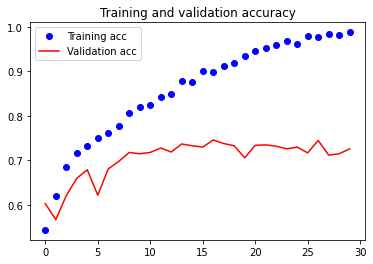

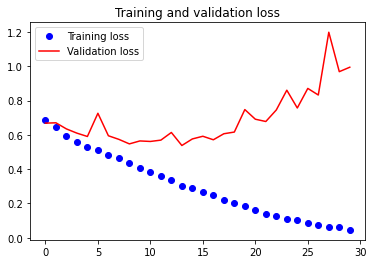

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc', )
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see in the plots that the model is overfitting. The train accuracy increase linearly over time, whereas the validation accuracy stall at 70%. The validation loss reaches its minimun after five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

## Data Augmentation
One of the main causes of overfitting is the lack of samples in training. **Data Augmentation** consists on gfenerating more training data via transformations that yield believable-looking images. The goal is that at training phase, the model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.
In Keras we can configure a number of random transformations to be performed on the images read by the generator.

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

The used parameters are:
- *rotation_range*: degree values in 0-180 range. A range within which to randomly rotate pictures.
- *width_shift_range* and *height_shift_range*: range within which to randomly translate pictures vertically or horizontally.
- *shear_range*: randomly applying shearing transformations.
- *zoom_range*: randomly zooming inside pictures.
- *horizontal_flip*:randomly flippling half the images horizontaly, relevant when there are no assumptions of horizontal asymmetry.
- *fill_mode*:strategy to use for filling in newly created pixels.
Let's take a look at the augmented images.

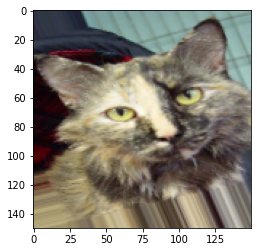

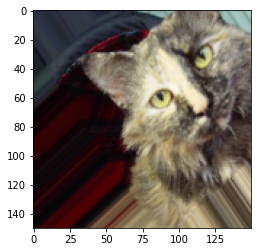

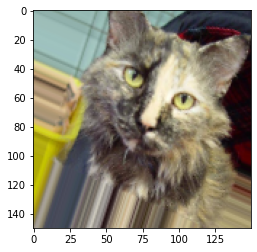

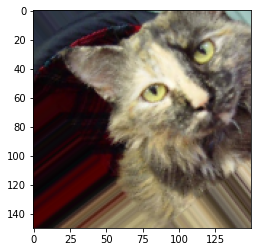

In [17]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Take some image to apply transformations
img_path = fnames[2]

# Read image and resize it
img = image.load_img(img_path, target_size=(150,150))

# Convert it to a ndarray with RGB channel (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1,150,150,3)
x = x.reshape((1,) + x.shape)

# With flow function batches of randomly transformed images are generated.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    img_plot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Due to the use of data augmentation we need to add Dropout layer to the model, because the training data is highly intercorrelated.

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Time to train the model

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Obviously validation data shoul not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=150,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/150
62/62 [==============================] - 26s 429ms/step - loss: 0.4171 - acc: 0.8079 - val_loss: 0.4743 - val_acc: 0.7671
Epoch 2/150
62/62 [==============================] - 26s 424ms/step - loss: 0.3969 - acc: 0.8211 - val_loss: 0.4210 - val_acc: 0.8065
Epoch 3/150
62/62 [==============================] - 26s 417ms/step - loss: 0.3786 - acc: 0.8313 - val_loss: 0.4134 - val_acc: 0.8145
Epoch 4/150
62/62 [==============================] - 26s 425ms/step - loss: 0.3788 - acc: 0.8359 - val_loss: 0.3946 - val_acc: 0.8317
Epoch 5/150
62/62 [==============================] - 26s 421ms/step - loss: 0.3827 - acc: 0.8359 - val_loss: 0.4521 - val_acc: 0.7994
Epoch 6/150
62/62 [==============================] - 26s 424ms/step - loss: 0.3893 - acc: 0.8277 - val_loss: 0.4048 - val_acc: 0.8216
Epoch 7/150
62/62 [==============================] - 26s 427ms/step - loss: 0.3847 - acc: 0.8211 - val_loss: 0.4

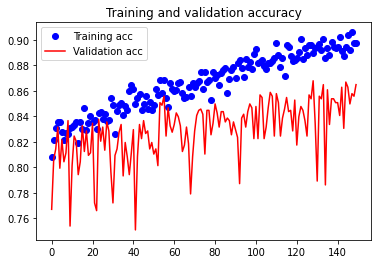

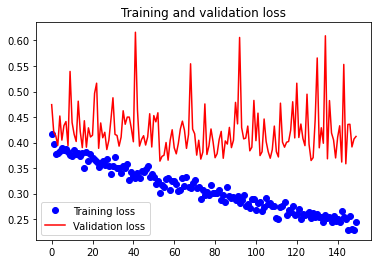

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size)

There is still overfitting, so let's try to use less epochs

In [ ]:
model.save('cats_and_dogs_small_2.h5')